In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv("Transmission_Lines.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SN              311 non-null    int64  
 1   from            311 non-null    object 
 2   to              311 non-null    object 
 3   voltage_kv      311 non-null    int64  
 4   length_km       311 non-null    float64
 5   circuit_type    311 non-null    object 
 6   conductor_type  308 non-null    object 
 7   conductor_size  306 non-null    object 
 8   circuit_km      311 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 22.0+ KB


In [3]:
# Basic statistics of transmission lines
print("Basic Statistics of Transmission Lines:")
print("\nVoltage Levels Summary:")
display(df['voltage_kv'].value_counts().sort_index())

print("\nCircuit Types Distribution:")
print(df['circuit_type'].value_counts())

print("\nLength Statistics (km):")
display(df['length_km'].describe())

print("\nTotal Circuit Kilometers by Voltage Level:")
voltage_circuit_km = df.groupby('voltage_kv')['circuit_km'].sum()
display(voltage_circuit_km)

Basic Statistics of Transmission Lines:

Voltage Levels Summary:


voltage_kv
132    237
230     54
400     20
Name: count, dtype: int64


Circuit Types Distribution:
circuit_type
Double    198
Single     85
Four       28
Name: count, dtype: int64

Length Statistics (km):


count    311.000000
mean      27.722352
std       32.536516
min        0.120000
25%        4.520000
50%       16.000000
75%       41.250000
max      217.200000
Name: length_km, dtype: float64


Total Circuit Kilometers by Voltage Level:


voltage_kv
132    8896.262
230    4263.490
400    2496.780
Name: circuit_km, dtype: float64

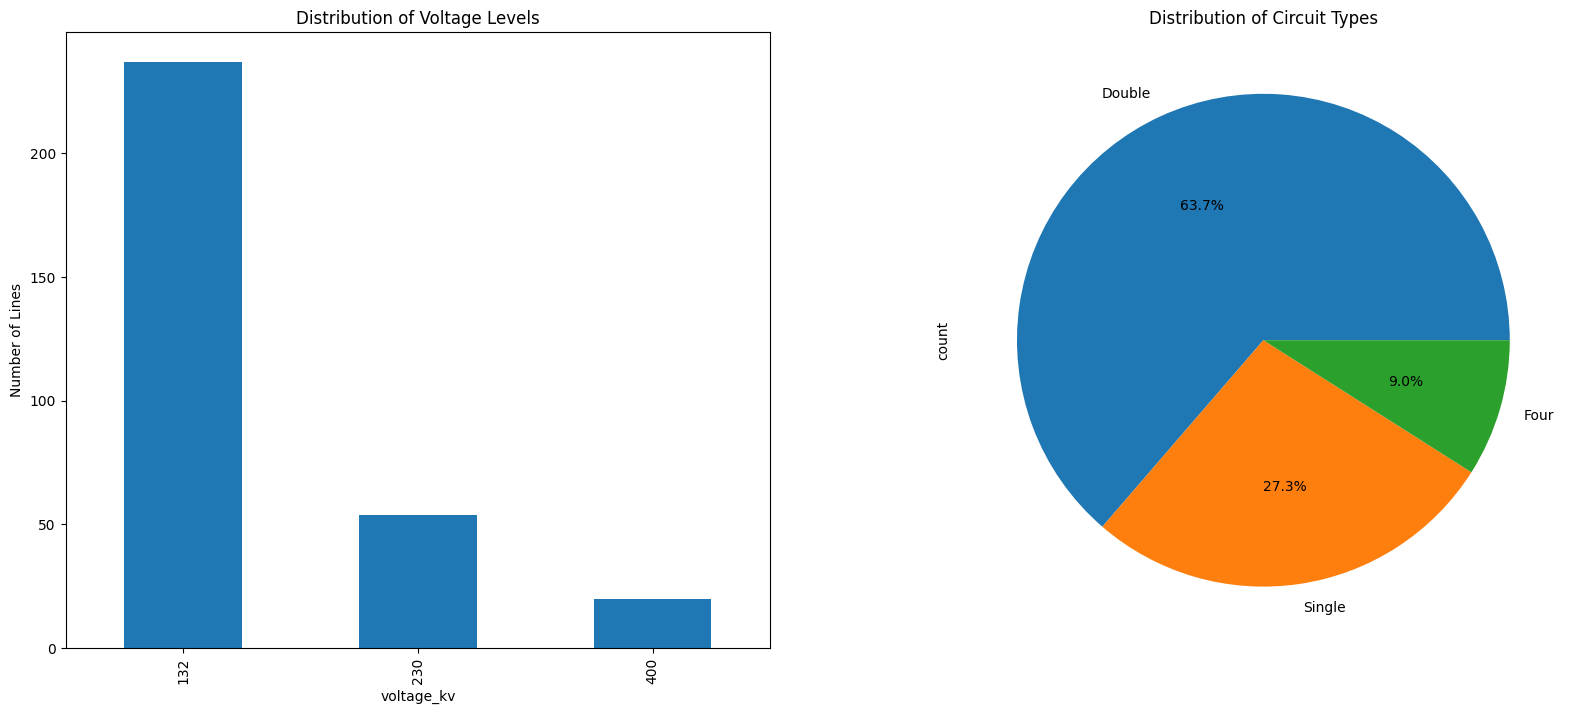

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
ax[0].set_title('Distribution of Voltage Levels')
ax[0].set_xlabel('Voltage (kV)')
ax[0].set_ylabel('Number of Lines')
df['voltage_kv'].value_counts().plot(kind='bar', ax=ax[0])


df['circuit_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Distribution of Circuit Types')


plt.show()

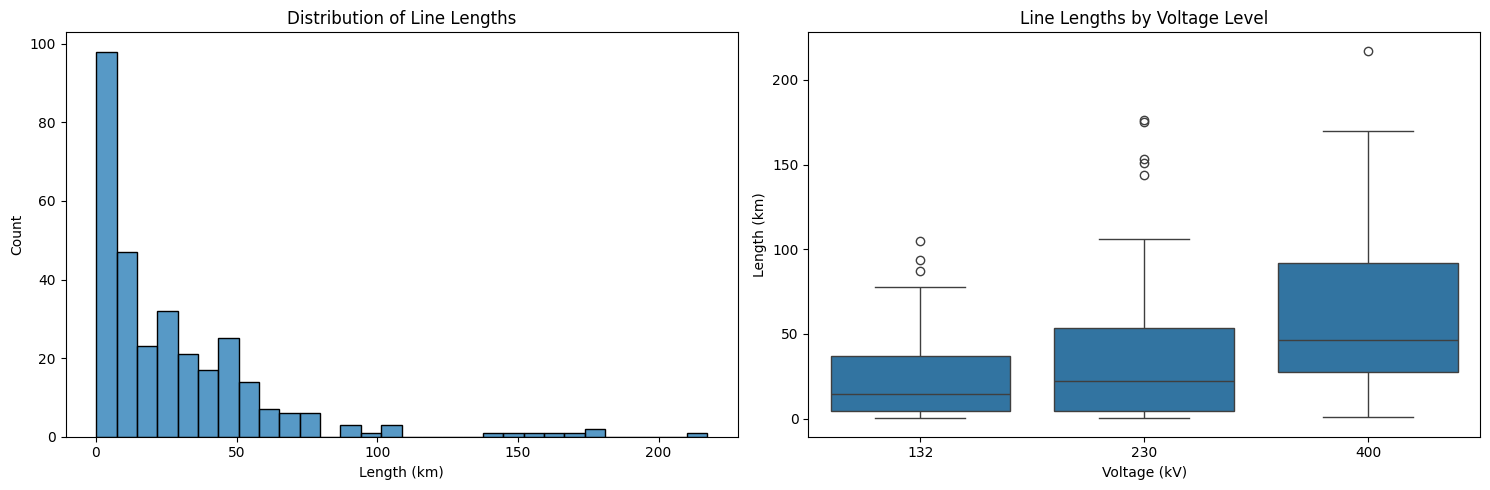

In [5]:
# 4. Length Analysis
plt.figure(figsize=(15, 5))

# Subplot 1: Length Distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='length_km', bins=30)
plt.title('Distribution of Line Lengths')
plt.xlabel('Length (km)')

# Subplot 2: Box Plot of Lengths by Voltage
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='voltage_kv', y='length_km')
plt.title('Line Lengths by Voltage Level')
plt.xlabel('Voltage (kV)')
plt.ylabel('Length (km)')

plt.tight_layout()
plt.show()

In [6]:
# 5. Analyze major transmission lines
print("\nTop 10 Longest Transmission Lines:")
display(df.nlargest(10, 'length_km')[['from', 'to', 'voltage_kv', 'length_km', 'circuit_type']])


Top 10 Longest Transmission Lines:


,from,to,voltage_kv,length_km,circuit_type
18,Madunaghat,Meghnaghat,400,217.20,Single
36,Khulna,Bheramara HVDC,230,176.50,Double
20,Ghorasal,Ishurdi,230,175.00,Double
3,Bibiyana,Kaliakoir,400,169.53,Double
5,Payra,Gopalganj(N),400,163.55,Double
43,Bibiyana,Comilla(N),230,153.55,Double
29,Comilla North,Hathazari,230,151.00,Double
35,Ashuganj,Sirajganj,230,144.00,Double
38,Bogra,Barapukuria,230,106.00,Double
138,Bheramara,Faridpur,132,105.00,Double


In [ ]:
# 6. Network Analysis
# Get unique substations (nodes)
substations = set(df['from'].unique()) | set(df['to'].unique())

# Calculate substation connections
substation_connections = {}
for station in substations:
    connections = df[df['from'].str.contains(station, na=False) | 
                    df['to'].str.contains(station, na=False)].shape[0]
    substation_connections[station] = connections

/tmp/ipykernel_13533/1831648672.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  connections = df[df['from'].str.contains(station, na=False) |
/tmp/ipykernel_13533/1831648672.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['to'].str.contains(station, na=False)].shape[0]


In [14]:
len(substations)

308

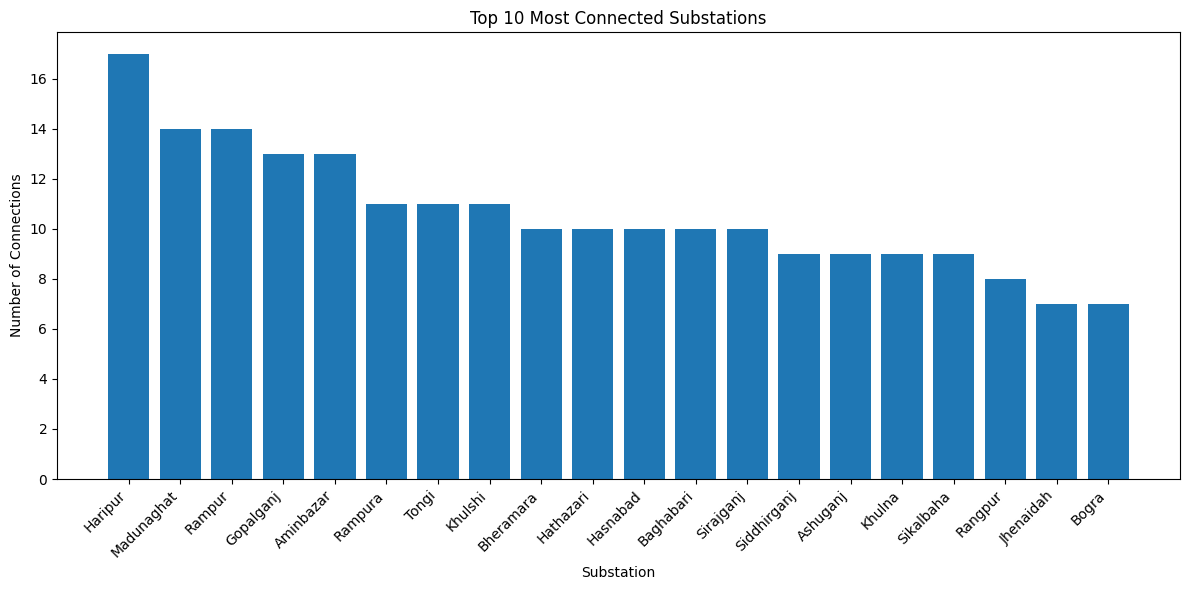


Top 10 Most Connected Substations:
Haripur: 17 connections
Madunaghat: 14 connections
Rampur: 14 connections
Gopalganj: 13 connections
Aminbazar: 13 connections
Rampura: 11 connections
Tongi: 11 connections
Khulshi: 11 connections
Bheramara: 10 connections
Hathazari: 10 connections
Hasnabad: 10 connections
Baghabari: 10 connections
Sirajganj: 10 connections
Siddhirganj: 9 connections
Ashuganj: 9 connections
Khulna: 9 connections
Sikalbaha: 9 connections
Rangpur: 8 connections
Jhenaidah: 7 connections
Bogra: 7 connections


In [13]:
top_connected = dict(sorted(substation_connections.items(), 
                          key=lambda x: x[1], reverse=True)[:20])

plt.figure(figsize=(12, 6))
plt.bar(top_connected.keys(), top_connected.values())
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Connected Substations')
plt.xlabel('Substation')
plt.ylabel('Number of Connections')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Connected Substations:")
for station, connections in top_connected.items():
    print(f"{station}: {connections} connections")

In [9]:
# Create nodes list containing unique station names from both 'from' and 'to' columns
nodes = sorted(list(set(df['from'].unique()) | set(df['to'].unique())))

for n in nodes:
    print(n)

132kV line
AES Haripur
AKSML
Aftabnagar
Agrabad
Aminbazar
Aminbazar 400/132kV transformer connecting
Aminbazar River Crossing
Aminbazar at Keraniganj
Aminbazar(With River)
Amnura
Amnura PP
Anowara
Ashuganj
Ashuganj(N)
BSRM
Bagerhat
Baghabari
Baghabari -Ishwardi line
Bakerganj
Bakulia
Banani
Bangabhaban
Bangladesh Border
Bangladesh Border (Baharampur)
Bangladesh Border (Baharampur) 2nd
Bangura
Banskhali
Barapukuria
Barapukuria at Bogura(West)
Barguna
Barguna PP
Barisal
Barisal(N)
Barishal
Barishal (N)
Barishal(N)
Barmi (BR Powergen)
Baroaulia
Baroirhat
Bashundhara
Basundhara
Beanibazar
Benapole
Bera PP
Bhaluka
Bhandaria
Bheramana
Bheramara
Bheramara 230
Bheramara HVDC
Bhola
Bhulta
Bibiyana
Bogra
BograNew
BograOld
Bogura 230kV
Bogura(West)
Brahmanbaria
Cantonment
Chandpur
Chandraghona
Chapai Nawabganj
Char Saidpur
Chhatak
Chowddagram
Chowmuhani
Chuadanga
Comilla (N)
Comilla (S)
Comilla North
Comilla(N)
Comilla(S)
Confedence PP
Confidence PP
Cox's Bazar
DU
Daudkandi
Daudkandi PP
Daudkandi